# M4: Assignment 1

## Part A: Manual SGD (First 3 Samples)

### Overview

In the dataset:

- \( X \) = number of claims
- \( Y \) = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

**Reference:** Swedish Committee on Analysis of Risk Premium in Motor Insurance


In [1]:
import pandas as pd

# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')
data.head(3)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7


In [2]:
# Manual SGD for all 3 samples

# Hyperparameters
learning_rate = 0.1
w = 2.5  # Initial weight

# Get first 3 samples
X = data['X'].head(3).values
Y = data['Y'].head(3).values

# Process each sample
for i in range(3):
    x = X[i]
    y_true = Y[i]
    
    # 1. Forward pass: compute prediction
    y_pred = w * x
    
    # 2. Evaluation: compute loss
    loss = (y_pred - y_true) ** 2
    
    # 3. Backward pass: compute gradient
    grad = 2 * (y_pred - y_true) * x
    
    # 4. Backpropagation: update weight
    w_new = w - learning_rate * grad
    
    print(f"Sample {i+1}: x={x:.6f}, y_true={y_true:.6f}, y_pred={y_pred:.6f}, loss={loss:.6f}, grad={grad:.6f}, w_old={w:.6f}, w_new={w_new:.6f}")
    
    # Update weight for next iteration
    w = w_new


Sample 1: x=108.000000, y_true=392.500000, y_pred=270.000000, loss=15006.250000, grad=-26460.000000, w_old=2.500000, w_new=2648.500000
Sample 2: x=19.000000, y_true=46.200000, y_pred=50321.500000, loss=2527605790.090000, grad=1910461.400000, w_old=2648.500000, w_new=-188397.640000
Sample 3: x=13.000000, y_true=15.700000, y_pred=-2449169.320000, loss=5998507262192.402344, grad=-63678810.520000, w_old=-188397.640000, w_new=6179483.412000


#### Output Explanation

Each line shows the following values for each sample:

- **`Sample`**: Which sample we're processing (1, 2, or 3)
- **`x`**: Input value (number of claims)
- **`y_true`**: Actual target value (actual payment amount)
- **`y_pred`**: Predicted value from forward pass (w × x)
- **`loss`**: How wrong the prediction was (y_pred - y_true)²
- **`grad`**: Gradient - tells us how much to adjust the weight (∂L/∂w)
- **`w_old`**: Current weight before update
- **`w_new`**: Updated weight after backpropagation (w_old - α × grad)

## Part B: Attention Contextualization

Word for attention analysis: **Trunk**

Sentences:
* The cat is stuck in the trunk of the car
* The cat climbed the trunk of the tree

In [3]:
import numpy as np

# Define embeddings for all unique words
embeddings = {
    "the": np.array([0.1, 0.1]),
    "cat": np.array([0.6, 0.7]),
    "is": np.array([0.2, 0.1]),
    "stuck": np.array([0.4, 0.3]),
    "in": np.array([0.1, 0.2]),
    "trunk": np.array([0.5, 0.5]),  # Same embedding initially for both contexts
    "of": np.array([0.2, 0.1]),
    "car": np.array([0.7, 0.4]),
    "climbed": np.array([0.5, 0.6]),
    "tree": np.array([0.6, 0.8])
}

In [4]:
# Softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Sentence 1: "the cat is stuck in the trunk of the car"
sentence_1 = ["the", "cat", "is", "stuck", "in", "the", "trunk", "of", "the", "car"]

# Initialize matrices Q, K, V
Q_1 = np.array([embeddings[word] for word in sentence_1])
K_1 = np.array([embeddings[word] for word in sentence_1])
V_1 = np.array([embeddings[word] for word in sentence_1])

# Step 1: Similarity - Calculate attention scores (Q·K^T)
attention_scores_1 = Q_1.dot(K_1.T)

# Step 2: Weights - Apply softmax
attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)

# Step 3: Contextualized vectors - Multiply weights by V
attention_output_1 = attention_weights_1.dot(V_1)

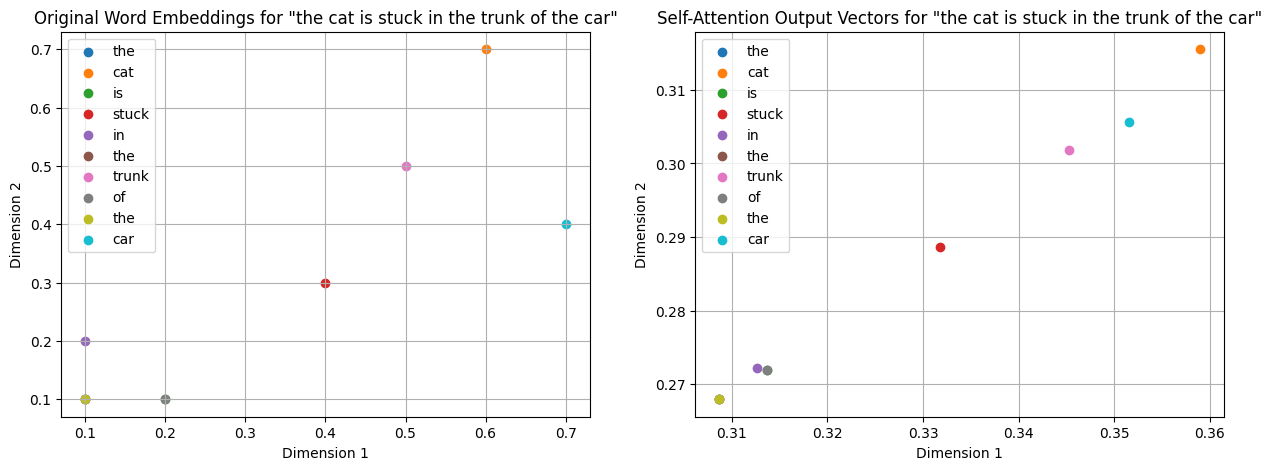

In [5]:
import matplotlib.pyplot as plt

# Plotting the original embeddings and the attention output for the first sentence

# Extract the relevant embeddings for the first sentence
sentence_embeddings_1 = np.array([embeddings[word] for word in sentence_1])

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_1):
    axes[0].scatter(sentence_embeddings_1[i, 0], sentence_embeddings_1[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for "the cat is stuck in the trunk of the car"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot contextualized embeddings (after attention)
for i, word in enumerate(sentence_1):
    axes[1].scatter(attention_output_1[i, 0], attention_output_1[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for "the cat is stuck in the trunk of the car"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

In [6]:
# Sentence 2: "the cat climbed the trunk of the tree"
sentence_2 = ["the", "cat", "climbed", "the", "trunk", "of", "the", "tree"]

Q_2 = np.array([embeddings[word] for word in sentence_2])
K_2 = np.array([embeddings[word] for word in sentence_2])
V_2 = np.array([embeddings[word] for word in sentence_2])

attention_scores_2 = Q_2.dot(K_2.T)
attention_weights_2 = np.apply_along_axis(softmax, 1, attention_scores_2)
attention_output_2 = attention_weights_2.dot(V_2)

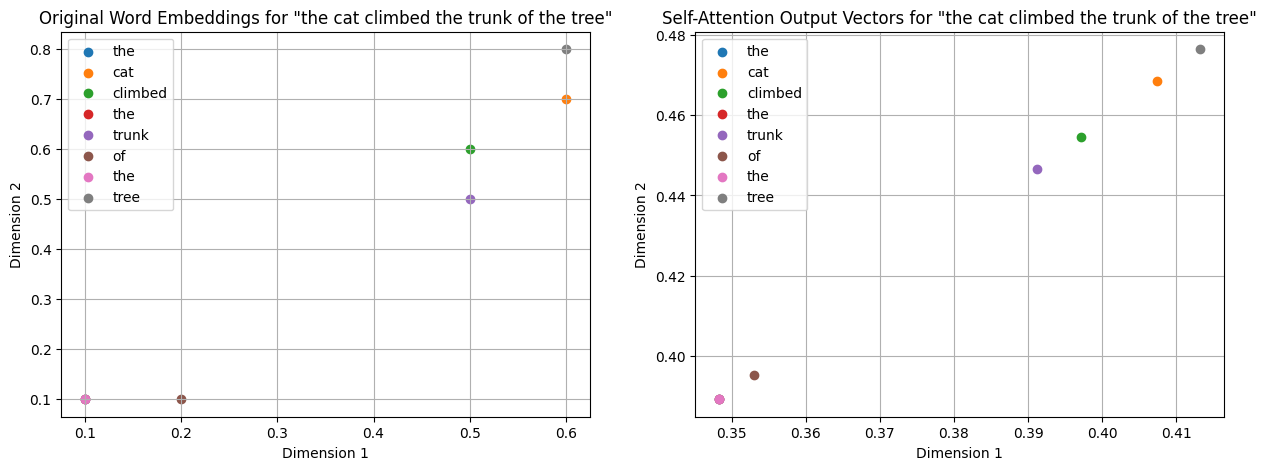

In [7]:
# Plotting the original embeddings and the attention output for the second sentence

# Extract the relevant embeddings for the second sentence
sentence_embeddings_2 = np.array([embeddings[word] for word in sentence_2])

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_2):
    axes[0].scatter(sentence_embeddings_2[i, 0], sentence_embeddings_2[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for "the cat climbed the trunk of the tree"')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot contextualized embeddings (after attention)
for i, word in enumerate(sentence_2):
    axes[1].scatter(attention_output_2[i, 0], attention_output_2[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for "the cat climbed the trunk of the tree"')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

In [8]:
from numpy.linalg import norm

# Find position of "trunk" in both sentences
trunk_pos_1 = sentence_1.index("trunk")  # Position 6
trunk_pos_2 = sentence_2.index("trunk")  # Position 4

# Original embeddings (identical for both)
original_trunk = embeddings["trunk"]

# Contextualized embeddings (different after attention)
context_trunk_1 = attention_output_1[trunk_pos_1]  # trunk of car
context_trunk_2 = attention_output_2[trunk_pos_2]  # trunk of tree

print("=== Original Embeddings ===")
print(f"Trunk (same in both): {original_trunk}")

print("\n=== Contextualized Embeddings ===")
print(f"Trunk (car context): {context_trunk_1}")
print(f"Trunk (tree context): {context_trunk_2}")

# Euclidean Distance
euclidean_original = norm(original_trunk - original_trunk)  # Will be 0
euclidean_context = norm(context_trunk_1 - context_trunk_2)

print("\n=== Validation ===")
print(f"Euclidean Distance:")
print(f"  Original embeddings: {euclidean_original:.4f} (same word, so = 0.0)")
print(f"  Contextualized embeddings: {euclidean_context:.4f} (shows the shift!)")

=== Original Embeddings ===
Trunk (same in both): [0.5 0.5]

=== Contextualized Embeddings ===
Trunk (car context): [0.34525791 0.30186913]
Trunk (tree context): [0.39126576 0.44652641]

=== Validation ===
Euclidean Distance:
  Original embeddings: 0.0000 (same word, so = 0.0)
  Contextualized embeddings: 0.1518 (shows the shift!)


#### Interpretation of Results

**Original Embeddings (Static):**
- The word "trunk" has identical embeddings in both sentences: `[0.5, 0.5]`
- Euclidean distance between the two instances = 0.0 (completely identical)
- This represents the limitation of traditional word embeddings
- They cannot distinguish between different meanings of the same word

**Contextualized Embeddings (After Self-Attention):**
- "trunk" in sentence 1 (car context): shifted toward "car", "stuck", and "in"
- "trunk" in sentence 2 (tree context): shifted toward "tree", "climbed"
- Euclidean distance > 0 (showing meaningful separation)
- The embeddings now capture the distinct meanings:
  - **Sentence 1**: trunk as a storage compartment of a vehicle
  - **Sentence 2**: trunk as the main stem of a tree